In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [5]:
train =pd.read_csv("/content/train__dataset.csv")

In [6]:
train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [7]:
train.shape

(18137, 18)

In [8]:
test = pd.read_csv("/content/train__dataset.csv")

In [9]:
test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [10]:
train.isnull().any()

no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

In [11]:
train.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000
mean,1.846777,0.107515,0.811104,2.208965,0.318465,0.031648,0.336770,85.377405,2017.820698,7.432762,15.660804,0.806197,0.025087,0.022440,0.151403,103.478868,0.617522,0.327618
std,0.516020,0.408901,0.873470,1.426365,0.629140,0.175066,0.772865,86.611736,0.383616,3.076999,8.772788,0.645972,0.156393,0.370078,1.714135,35.474103,0.787941,0.469357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,120.270000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


Text(0.5, 1.0, 'Pie Chart Showing the Distribution of Booking Status into Number of Cancellation/Non Cancellation ')

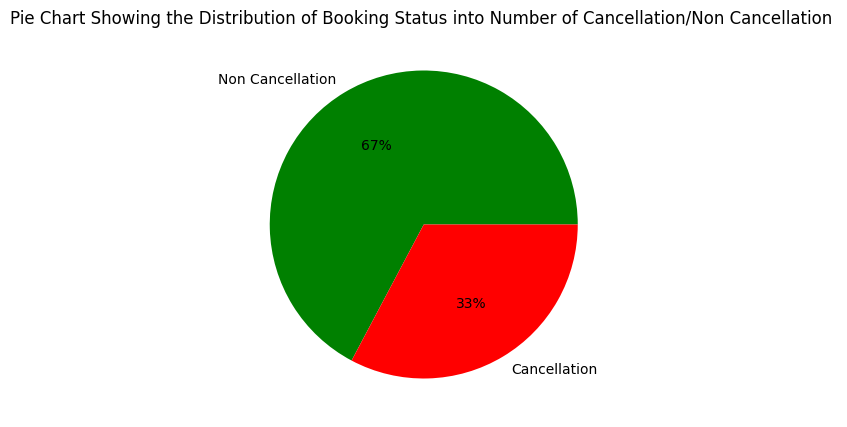

In [12]:
plt.figure(figsize =(5,5))

a=train['booking_status'].value_counts()
plt.pie(x =a, data = train, labels =['Non Cancellation','Cancellation'],autopct='%.0f%%',colors ='gr')
plt.title("Pie Chart Showing the Distribution of Booking Status into Number of Cancellation/Non Cancellation ")

array([[<Axes: title={'center': 'no_of_adults'}>,
        <Axes: title={'center': 'no_of_children'}>,
        <Axes: title={'center': 'no_of_weekend_nights'}>,
        <Axes: title={'center': 'no_of_week_nights'}>],
       [<Axes: title={'center': 'type_of_meal_plan'}>,
        <Axes: title={'center': 'required_car_parking_space'}>,
        <Axes: title={'center': 'room_type_reserved'}>,
        <Axes: title={'center': 'lead_time'}>],
       [<Axes: title={'center': 'arrival_year'}>,
        <Axes: title={'center': 'arrival_month'}>,
        <Axes: title={'center': 'arrival_date'}>,
        <Axes: title={'center': 'market_segment_type'}>],
       [<Axes: title={'center': 'repeated_guest'}>,
        <Axes: title={'center': 'no_of_previous_cancellations'}>,
        <Axes: title={'center': 'no_of_previous_bookings_not_canceled'}>,
        <Axes: title={'center': 'avg_price_per_room'}>],
       [<Axes: title={'center': 'no_of_special_requests'}>,
        <Axes: title={'center': 'booking_st

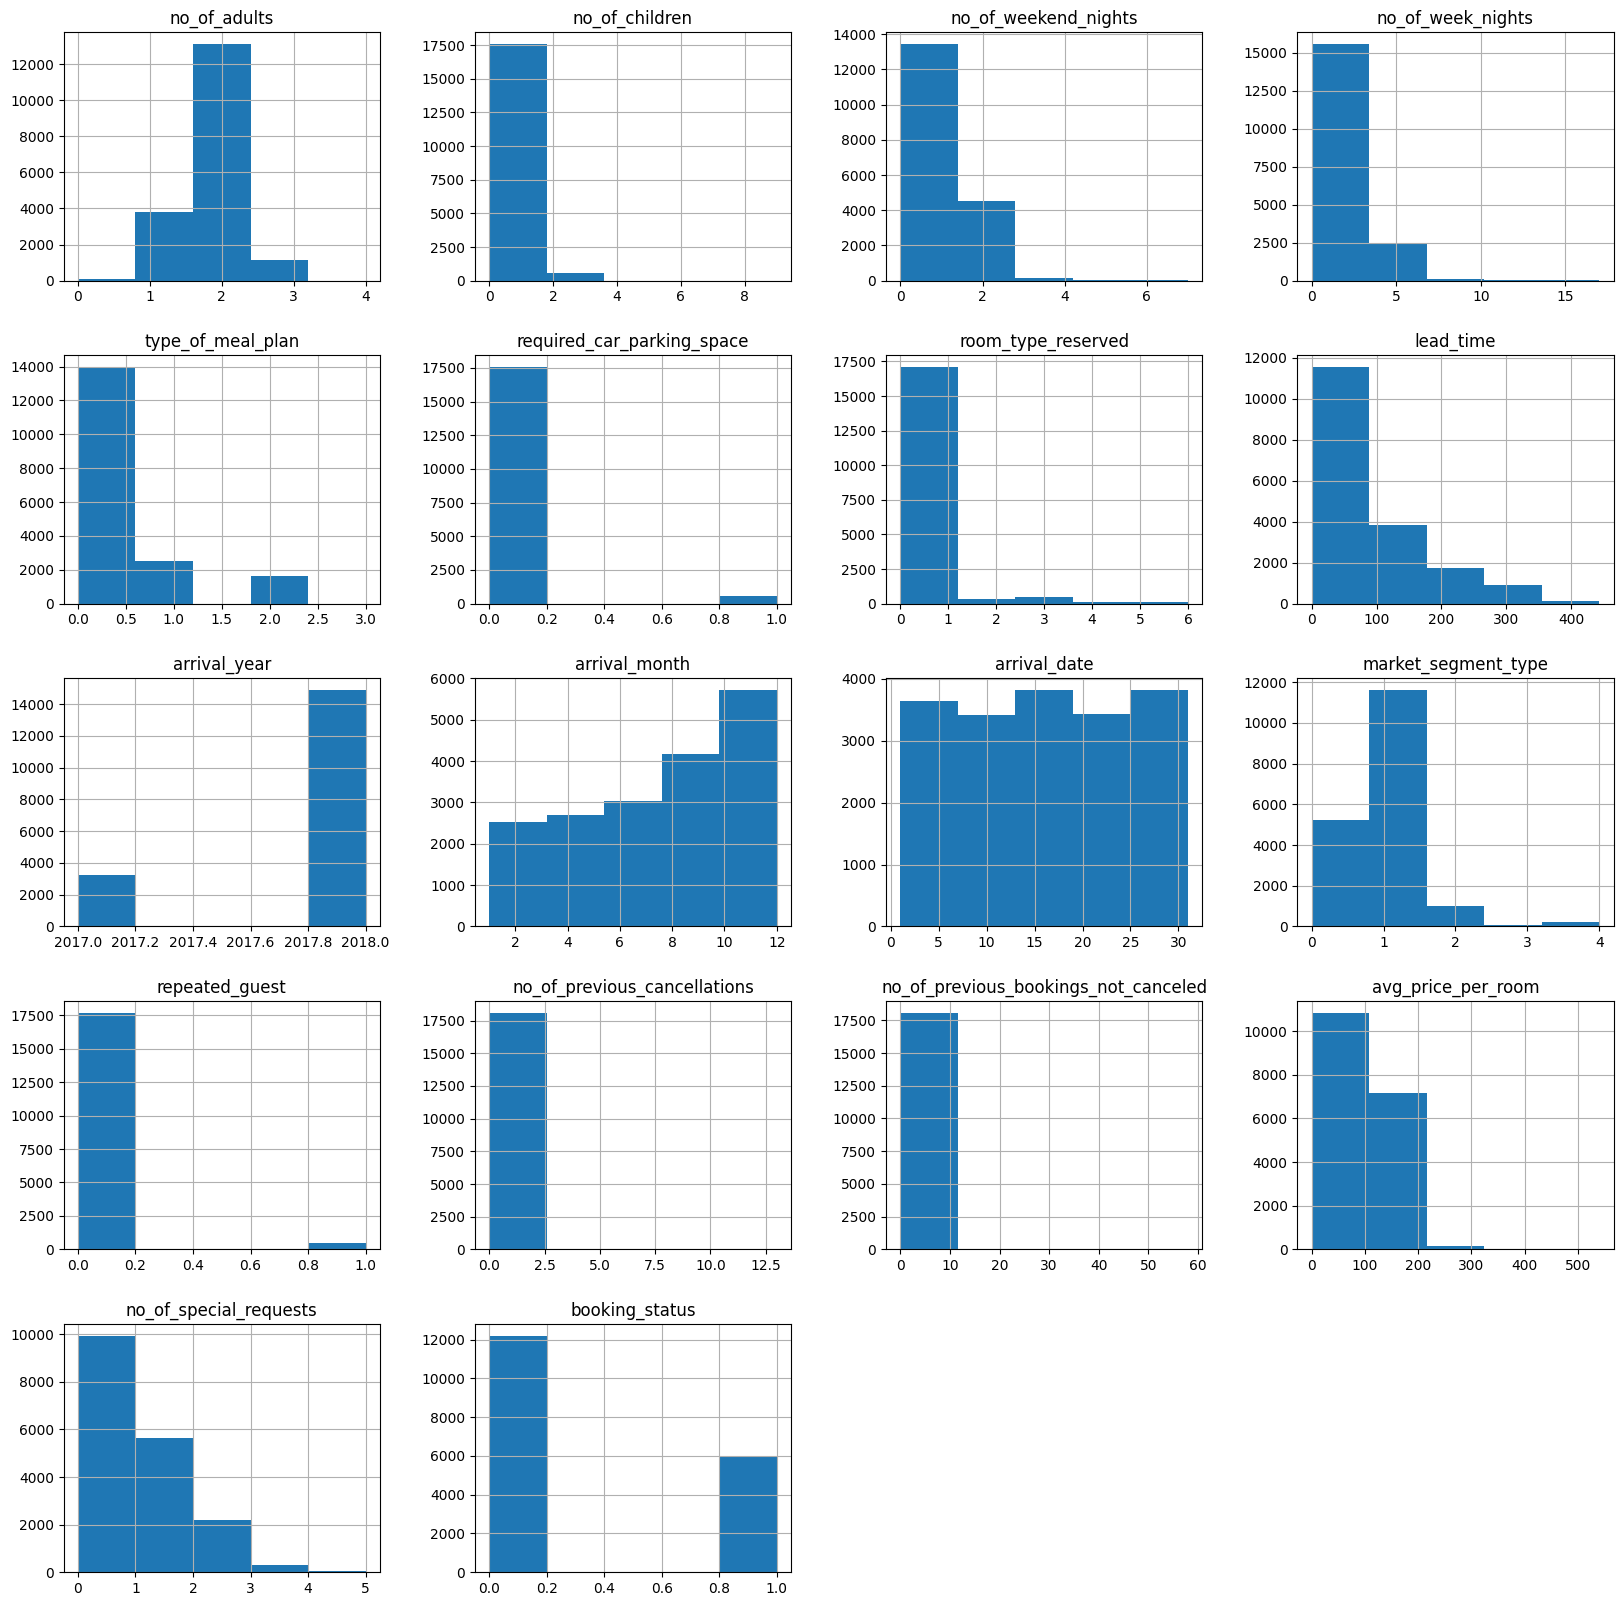

In [13]:
train.hist(bins=5,figsize=(20,20))

In [14]:
def countplot_of_2(x,hue,title=None,figsize=(6,5)):
  plt.figure(figsize=figsize)
  sns.countplot(data=train[[x,hue]],x=x,hue=hue)
  plt.title(title)
  plt.show()

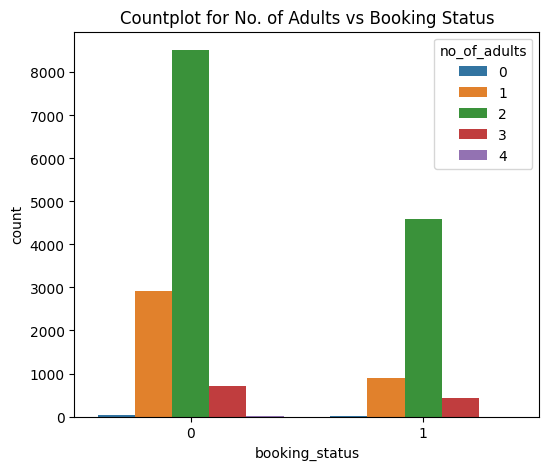

In [15]:
countplot_of_2('booking_status','no_of_adults','Countplot for No. of Adults vs Booking Status')

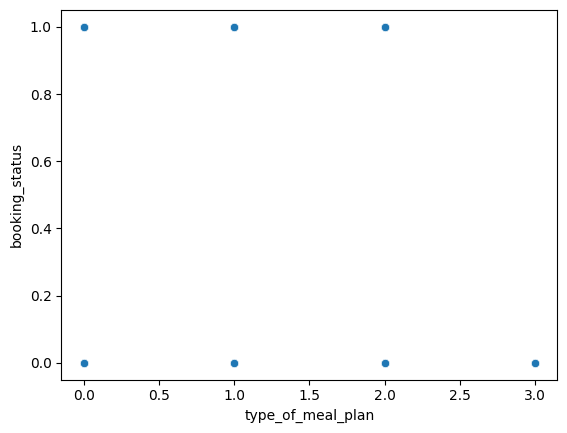

In [16]:
sns.scatterplot(data = train,x = "type_of_meal_plan",y ="booking_status")
plt.show()

In [17]:
corr = train.corr()
corr.style.background_gradient('coolwarm')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.017565,0.098241,0.103135,0.025139,0.010956,0.163542,0.098254,0.077915,0.018254,0.028433,-0.098518,-0.198334,-0.043494,-0.119703,0.292910,0.179970,0.094354
no_of_children,-0.017565,1.000000,0.026761,0.018957,-0.066445,0.026409,0.484223,-0.051646,0.044164,0.008244,0.020804,0.078264,-0.037868,-0.015580,-0.021495,0.342425,0.128325,0.035093
no_of_weekend_nights,0.098241,0.026761,1.000000,0.188796,-0.048357,-0.029054,0.044741,0.047559,0.054914,-0.010060,0.024026,-0.011626,-0.058549,-0.015543,-0.018829,-0.005837,0.057814,0.061117
no_of_week_nights,0.103135,0.018957,0.188796,1.000000,-0.076067,-0.054087,0.066756,0.148348,0.037240,0.044170,-0.007471,-0.060650,-0.094936,-0.024761,-0.041108,0.029326,0.037413,0.096472
type_of_meal_plan,0.025139,-0.066445,-0.048357,-0.076067,1.000000,-0.021426,-0.146645,0.134350,-0.083469,0.019607,0.019243,-0.156242,-0.068313,-0.018854,-0.042258,0.039359,-0.054258,0.076685
required_car_parking_space,0.010956,0.026409,-0.029054,-0.054087,-0.021426,1.000000,0.031255,-0.076608,0.006502,-0.018159,-0.008735,0.109336,0.116001,0.027336,0.062674,0.062199,0.083360,-0.092640
room_type_reserved,0.163542,0.484223,0.044741,0.066756,-0.146645,0.031255,1.000000,-0.088265,0.073680,0.003517,0.030617,0.165417,-0.006948,-0.001362,-0.001447,0.411577,0.121888,0.021723
lead_time,0.098254,-0.051646,0.047559,0.148348,0.134350,-0.076608,-0.088265,1.000000,0.148482,0.140062,0.012856,-0.312090,-0.135079,-0.042747,-0.078664,-0.069985,-0.103707,0.434314
arrival_year,0.077915,0.044164,0.054914,0.037240,-0.083469,0.006502,0.073680,0.148482,1.000000,-0.343696,0.008437,0.083831,-0.018765,0.006593,0.025689,0.184786,0.048557,0.183256
arrival_month,0.018254,0.008244,-0.010060,0.044170,0.019607,-0.018159,0.003517,0.140062,-0.343696,1.000000,-0.034861,-0.038777,-0.004458,-0.040632,-0.015225,0.053381,0.103389,-0.011472


<function matplotlib.pyplot.show(close=None, block=None)>

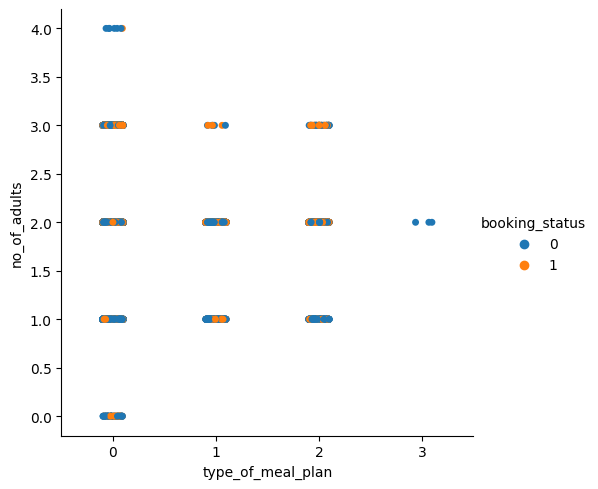

In [18]:
sns.catplot(data = train ,x ="type_of_meal_plan",y ="no_of_adults",hue='booking_status')
plt.show

In [19]:
X = train.drop('booking_status',axis=1)
y = train['booking_status']

In [20]:
train['booking_status'].value_counts()

0    12195
1     5942
Name: booking_status, dtype: int64

In [21]:
from imblearn import over_sampling

In [22]:
os = over_sampling.RandomOverSampler()

In [24]:
X,y =os.fit_resample(X,y)

In [25]:
y.value_counts()

0    12195
1    12195
Name: booking_status, dtype: int64

In [26]:
X_train, X_val, y_train, y_val= train_test_split(X,y,test_size=0.2)

In [27]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [28]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [29]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [30]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [167]:
def model_evaluation(classifier):
  cm =confusion_matrix(y_val, classifier.predict(X_val))
  counts = [value for value in cm.flatten()]
  labels = [f'{v1}' for v1 in counts]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot = labels, cmap = 'Greens',fmt= '')
  y_pred = classifier.predict(X_val)
  yt_pred = classifier.predict(X_train)
  print('The Training Accuracy of the Algorithm is',accuracy_score(y_train,yt_pred))
  print('The Validation Accuracy of the algorithm is',accuracy_score(y_val,y_pred))
  return [(accuracy_score(y_train * 100, yt_pred * 100)*100),(accuracy_score(y_val * 100,y_pred * 100) * 100),f1_score(y_val,y_pred)]


The Training Accuracy of the Algorithm is 0.8624948749487494
The Validation Accuracy of the algorithm is 0.7956129561295613


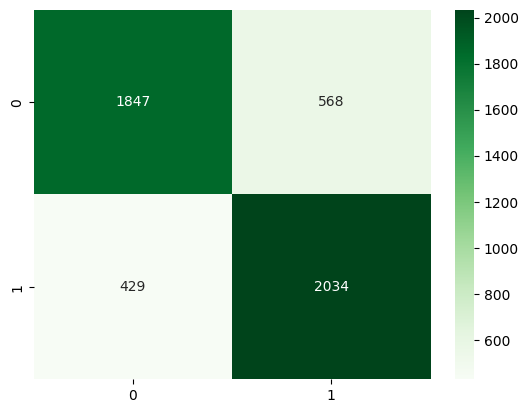

In [168]:
knn_r = model_evaluation(knn)

The Training Accuracy of the Algorithm is 0.6918819188191881
The Validation Accuracy of the algorithm is 0.6957769577695777


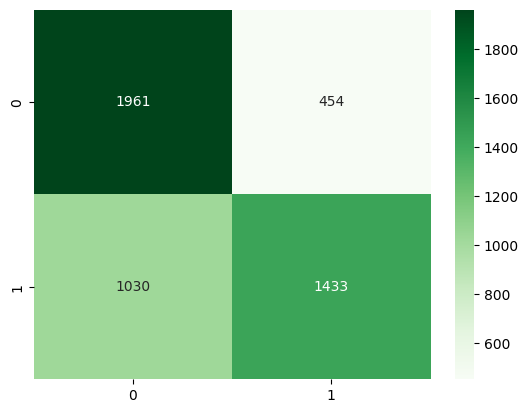

In [169]:
svm_r= model_evaluation(svm)

The Training Accuracy of the Algorithm is 0.5663181631816319
The Validation Accuracy of the algorithm is 0.5715457154571546


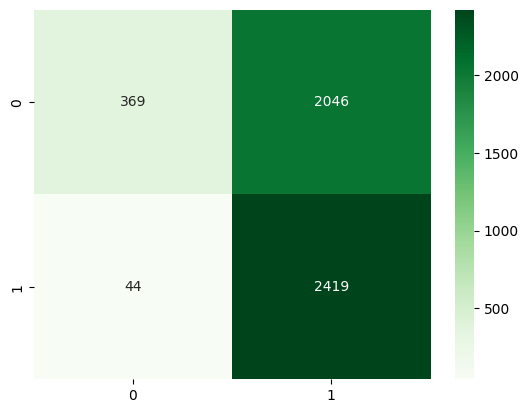

In [170]:
gnb_r = model_evaluation(gnb)

The Training Accuracy of the Algorithm is 0.7564575645756457
The Validation Accuracy of the algorithm is 0.7599425994259943


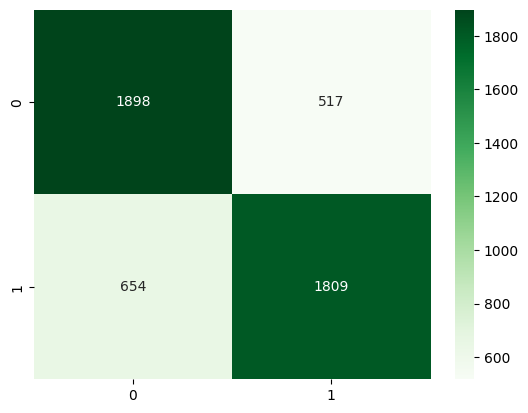

In [171]:
lr_r = model_evaluation(lr)

The Training Accuracy of the Algorithm is 0.9956949569495694
The Validation Accuracy of the algorithm is 0.9136941369413694


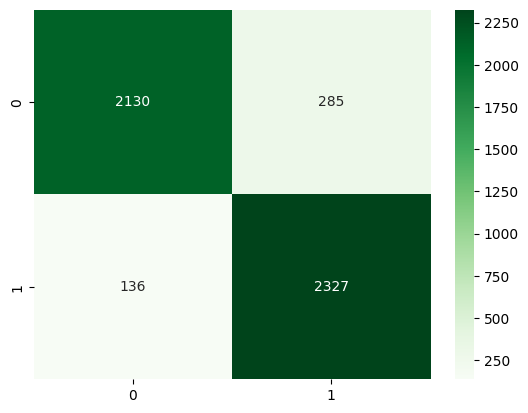

In [172]:
dt_r = model_evaluation(dt)

The Training Accuracy of the Algorithm is 0.9956949569495694
The Validation Accuracy of the algorithm is 0.9378843788437884


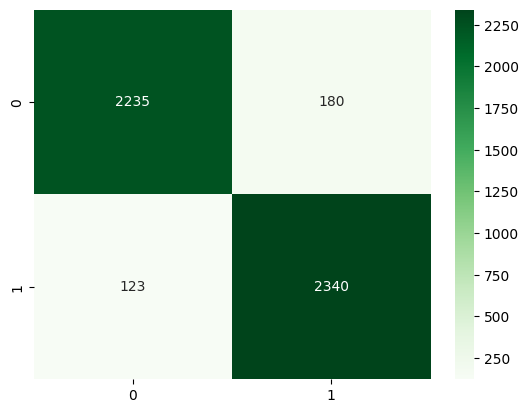

In [173]:
rf_r = model_evaluation(rf)

The Training Accuracy of the Algorithm is 0.8298995489954899
The Validation Accuracy of the algorithm is 0.8310783107831078


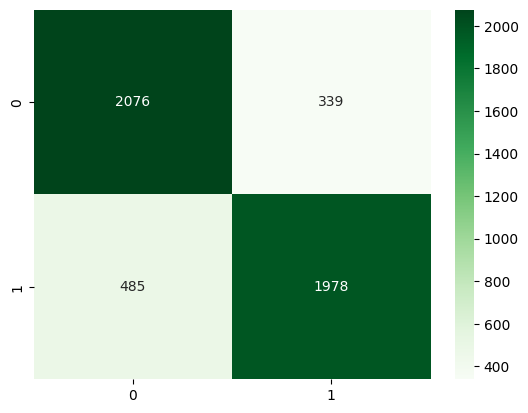

In [174]:
gb_r = model_evaluation(gb)

In [183]:
results = pd.DataFrame(data = [knn_r, svm_r, gnb_r, lr_r, dt_r, rf_r, gb_r],
                      columns = ['Training Accuracy','Validation Accuracy','F1 Score'],
                      index = ['K Nearest Neighbors','Support Vector Machines','Naive Bayes','Logistic Regression',
                               'Decision Tree','Random Forest','Gradient Boost'])

In [184]:
results

,Training Accuracy,Validation Accuracy,F1 Score
K Nearest Neighbors,86.249487,79.561296,0.803159
Support Vector Machines,69.188192,69.577696,0.658851
Naive Bayes,56.631816,57.154572,0.698326
Logistic Regression,75.645756,75.994260,0.755481
Decision Tree,99.569496,91.369414,0.917044
Random Forest,99.569496,93.788438,0.939193
Gradient Boost,82.989955,83.107831,0.827615


In [185]:
fi = rf.feature_importances_

In [187]:
col = train.columns

In [188]:
feat_imp = {}
for i, j in zip(fi,col):
  feat_imp[j] = i

In [189]:
feat_imp

{'no_of_adults': 0.02447802888841893,
 'no_of_children': 0.007463237438367037,
 'no_of_weekend_nights': 0.03761965656290485,
 'no_of_week_nights': 0.05274919204994817,
 'type_of_meal_plan': 0.02263649157813176,
 'required_car_parking_space': 0.008285744001927468,
 'room_type_reserved': 0.01701320979602846,
 'lead_time': 0.3054874284242003,
 'arrival_year': 0.030241094064293254,
 'arrival_month': 0.08630125674815113,
 'arrival_date': 0.09100281430503601,
 'market_segment_type': 0.055868633011796495,
 'repeated_guest': 0.003931855986580449,
 'no_of_previous_cancellations': 0.0003211357623266011,
 'no_of_previous_bookings_not_canceled': 0.0024839353311225483,
 'avg_price_per_room': 0.14881559449107884,
 'no_of_special_requests': 0.10530069155968771}

In [190]:
rfc_results = []

In [ ]:
def model_evaluation1(classifier):
for main in [0.03,0.025,0.020,0.014,0.008]:
  to_drop = []
  for i,j in zip(feat_imp.keys(), feat_imp.values()):
    if j < main:
      to_drop.append(i)

      X_new = X.drop(to_drop,axis = 1)
      y_new = y
      X1_train, X1_val, y1_train, y1_val = train_test_split(X_new,y_new,test_size=0.2)
      rfc_new = RandomForestClassifier()
      rfc_new.fit(X1_train,y1_train)
      temp1 = model_evaluation1(X1_train.shape[1], rfc_new)
      rfc_results.append(temp1)


: 

In [196]:
randomf = pd.DataFrame(data = rfc_results,columns=['Number of features','Training Accuracy','Validation Accuracy'])
randomf

,Number of features,Training Accuracy,Validation Accuracy


In [197]:
from sklearn.model_selection import GridSearchCV

In [198]:
parameters = {
    "max_features":[None, 6,7,8],
    "max_depth":[None, 13,15]
}

In [199]:
from sklearn.model_selection import KFold
gdcv = GridSearchCV(estimator=rf,param_grid=parameters)

In [200]:
gdcv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 13, 15],
                         'max_features': [None, 6, 7, 8]})

In [201]:
gdcv.best_params_

{'max_depth': None, 'max_features': 7}

In [202]:
rf_new =RandomForestClassifier(max_depth=15, max_features = 6)
rf_new.fit (X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=6)

The Training Accuracy of the Algorithm is 0.9462894628946289
The Validation Accuracy of the algorithm is 0.9130791307913079


[94.62894628946289, 91.30791307913078, 0.9137860919072794]

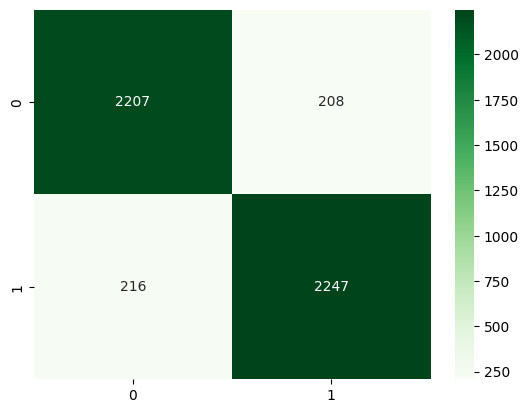

In [206]:
model_evaluation(rf_new)

In [207]:
pred = rf_new.predict(X_val)

In [208]:
pred

array([1, 1, 0, ..., 0, 1, 0])

In [209]:
pd.DataFrame({'Original':y_val,'Predicted':pred})

,Original,Predicted
20802,1,1
15037,0,1
13724,0,0
21091,1,1
15024,0,0
...,...,...
13468,0,0
5879,0,0
5231,0,0
23669,1,1


In [210]:
pickle.dump(rf_new,open('model.pkl','wb'))